In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
isi_data = pd.read_csv("../Merged_Data/Data_Merged_Isi.csv", sep=",", index_col=0)

In [17]:
isi_data.tail()

,Unnamed: 0_x,FZ-ID,AUFTRAGSNR,AUFTRAGSTEXT,ILA,WHO_NUMMER,AUFTRAGSART,ECKSTARTTERMIN,ECKENDTERMIN,BEZUGSDATUM,...,AUSMUSTERUNG_DAT,MOTORTYP,EURONORM,INBETRIEB_AB,KLIMAANLAGE,ABGASFILTER,ANZAHL_TUEREN,ZUL_100KMH,BAUJAHR,PLAETZE
320968,150489,4e03c539-3323-4dbf-991c-c07dec29405b,1037409470,Frist 510,510,135,510,43941,43941,43941,...,-9.223372e+18,D2066LUH47,5E,40350.0,1,03,2,0,2010.0,81
320969,150358,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,...,-9.223372e+18,D1556LOH10,6,43887.0,0,04,3,0,2020.0,145
320970,150358,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,...,-9.223372e+18,D1556LOH10,6,43887.0,0,04,3,0,2020.0,145
320971,150358,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,...,-9.223372e+18,D1556LOH10,6,43887.0,0,04,3,0,2020.0,145
320972,150715,8f565646-d72e-4c8a-a581-8b1ad9ab200d,1037415573,außerplanm. Instand.-25,031,55,3301,43942,43942,43942,...,-9.223372e+18,OM936LA,6,41541.0,10,04,2,1,2013.0,95


In [18]:
isi_data_neu = isi_data.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0_x.1', 'Unnamed: 0_y.1'], axis=1)

In [19]:
isi_dupli = isi_data_neu[isi_data_neu.duplicated()]
print('Anzahl der Duplikate: ', isi_dupli.shape)

Anzahl der Duplikate:  (0, 40)


In [20]:
isi_data_neu = isi_data_neu.drop_duplicates()

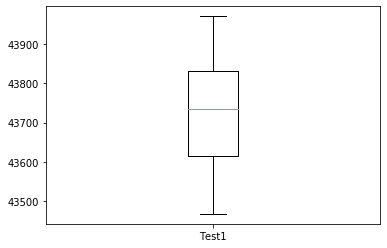

In [21]:
labels = ['Test1']
plot = plt.boxplot(isi_data_neu['BEZUGSDATUM'],vert=True, labels=labels)

plt.savefig('test.pdf') 

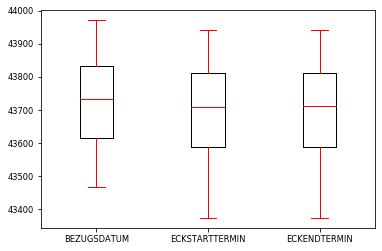

In [22]:
df = pd.DataFrame(data = isi_data_neu, columns = ['BEZUGSDATUM', 'ECKSTARTTERMIN', 'ECKENDTERMIN'])
df.plot(kind='box', grid=False, backend='matplotlib', rot=0, fontsize='small', 
        color=dict(boxes='black', whiskers='red', medians='red', caps='red'),
        boxprops=dict(linestyle='-', linewidth=1),
        flierprops=dict(linestyle='-', linewidth=1),
        medianprops=dict(linestyle='-', linewidth=1),
        whiskerprops=dict(linestyle='-', linewidth=1),
        capprops=dict(linestyle='-', linewidth=1),showfliers=True,)

plt.savefig('test2.pdf')

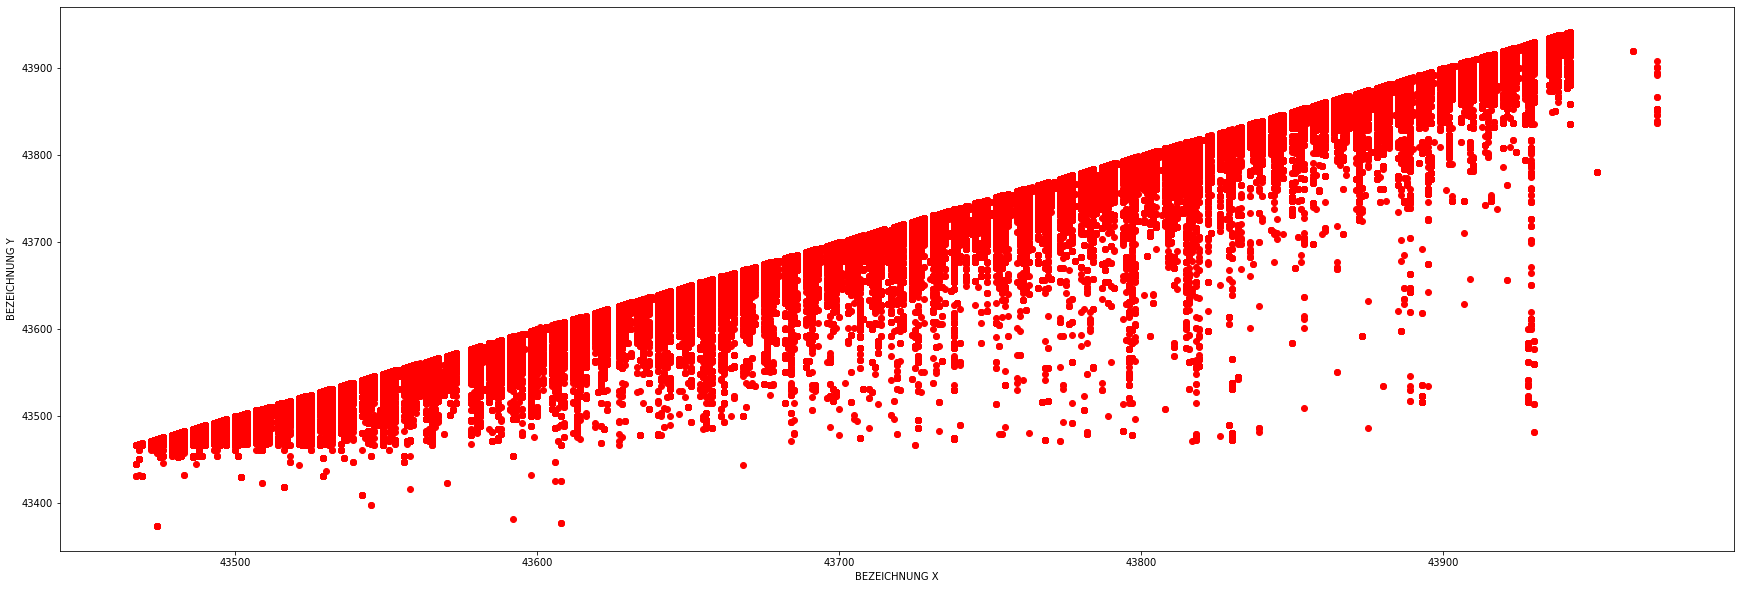

In [23]:
fig, ax = plt.subplots(figsize=(30,10))
ax.scatter(isi_data_neu['BEZUGSDATUM'], isi_data_neu['ECKSTARTTERMIN'], color='red')
ax.set_xlabel('BEZEICHNUNG X')
ax.set_ylabel('BEZEICHNUNG Y')

plt.savefig('test3.pdf')

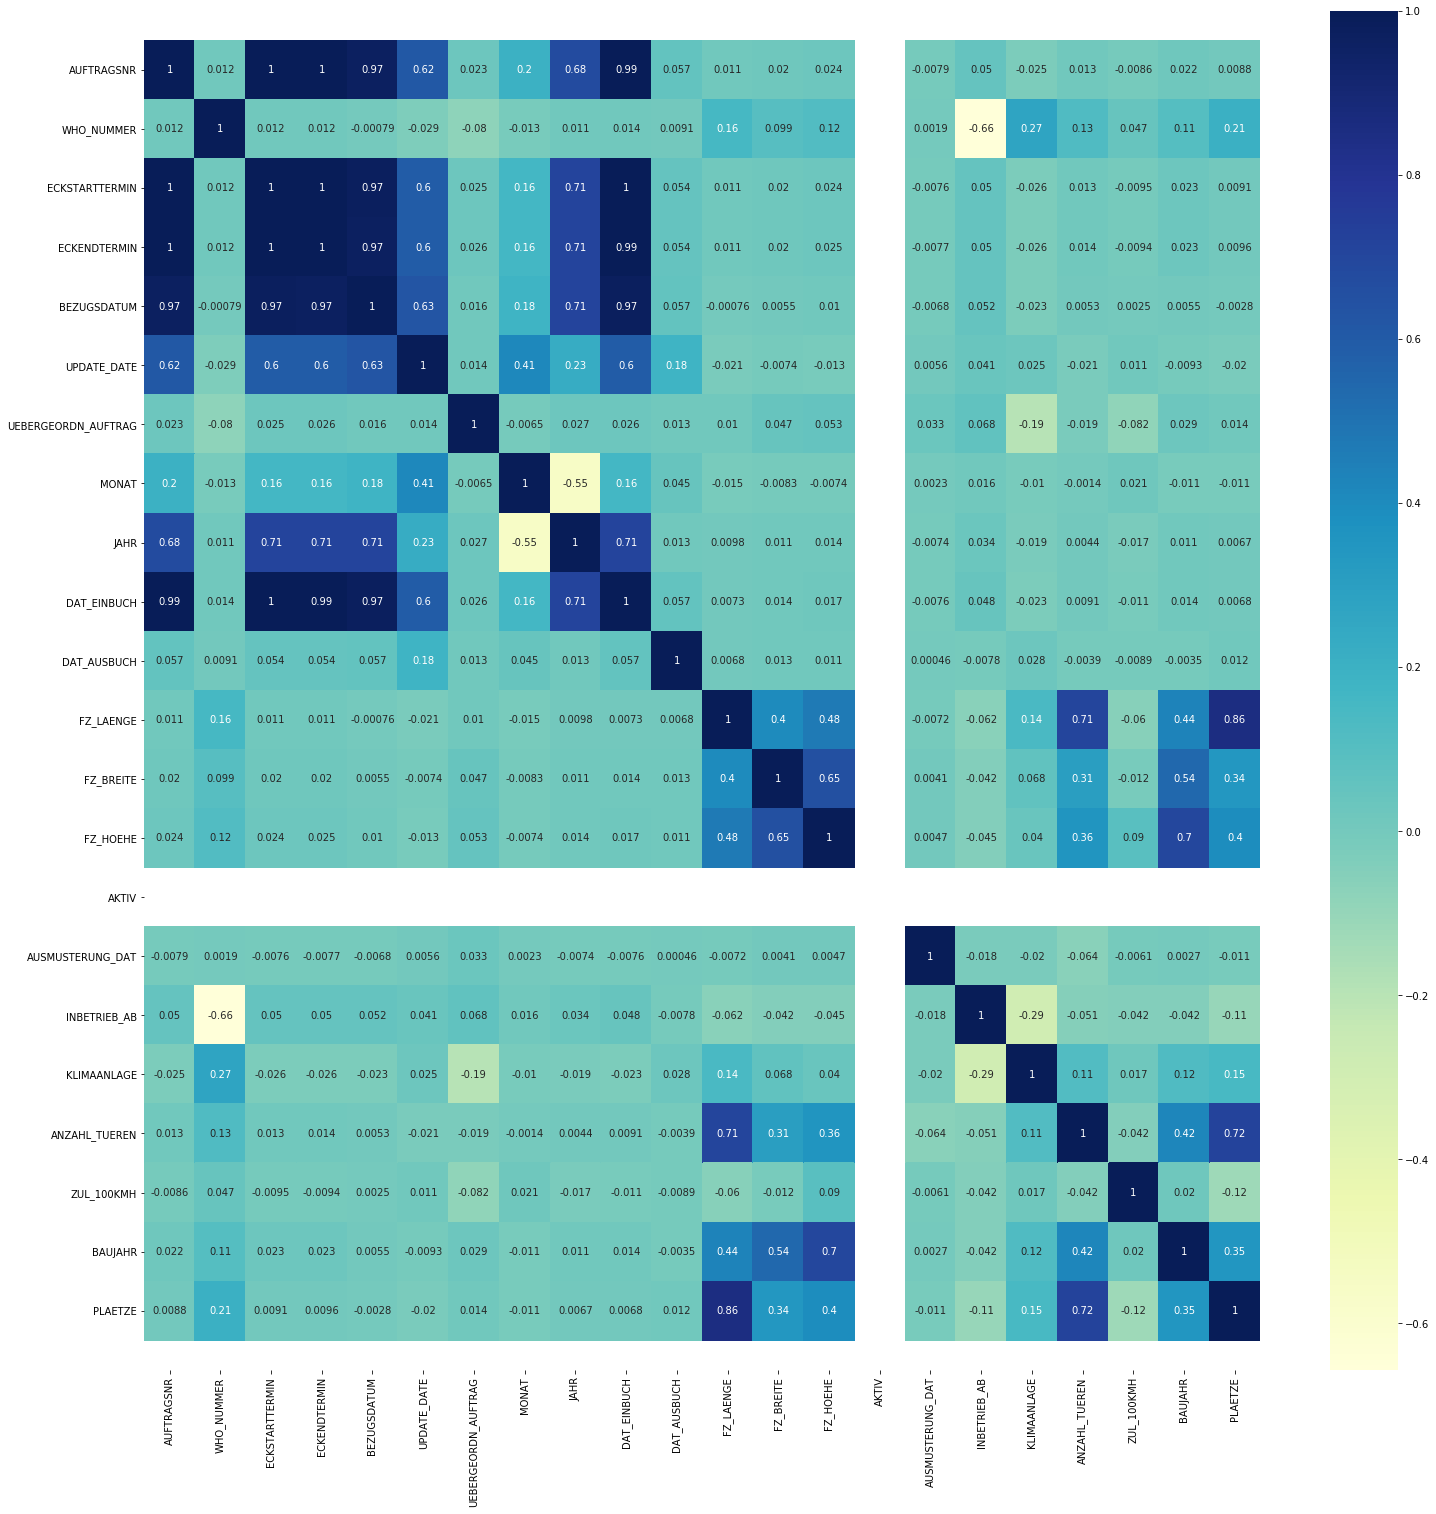

In [24]:
plt.figure(figsize=(25,25))
df_corr = isi_data_neu.corr()
ax = sns.heatmap(df_corr,cmap='YlGnBu',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('test4.pdf')